In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py

In [3]:
ls

plot_SOPT.ipynb        SelfEnergyR_c_cxx.dat  SOPT_Keldysh_diagrammatics.pdf
SelfEnergyK_c_cxx.dat  SelfEnergyR_cxx.dat
SelfEnergyK_cxx.dat    SIAM_SOPT_FFT.h5


In [4]:
file = h5py.File("SIAM_SOPT_FFT.h5") # load h5 file

In [5]:
list(file) # look at data

['Gamma',
 'ImPi_a_odd_even',
 'ImPi_a_odd_odd',
 'ImSE',
 'RePi_a_odd_even',
 'RePi_a_odd_odd',
 'ReSE',
 'U',
 'beta',
 'data-points-in-calculation',
 'max-time-span',
 'v']

In [14]:
v = np.array(file['v']); # load data
PiOE = np.array(file['RePi_a_odd_even']) + 1j*np.array(file['ImPi_a_odd_even'])
PiOO = np.array(file['RePi_a_odd_odd']) + 1j*np.array(file['ImPi_a_odd_odd'])

data1 = np.loadtxt('../../cmake-build-debug/Output/Pia_odd_even.dat')
data2 = np.loadtxt('../../cmake-build-debug/Output/Pia_odd_odd_c.dat')
data10 = np.loadtxt('../../cmake-build-debug/Output/PiaOE.dat')
data11 = np.loadtxt('../../cmake-build-debug/Output/PiaOO.dat')

In [15]:
w = data1[:,0]

w_test = data10[:,0]
Re_Pia_OE = data1[:,1]
Im_Pia_OE = data1[:,2]

Re_Pia_OO = data2[:,1]
Im_Pia_OO = data2[:,2]

RePiOE_SOPT = data10[:,1]
ImPiOE_SOPT = data10[:,2]

RePiOO_SOPT = data11[:,1]
ImPiOO_SOPT = data11[:,2]

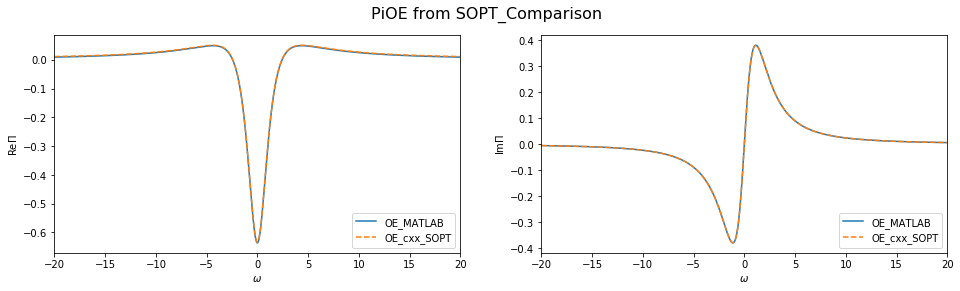

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("PiOE from SOPT_Comparison", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*20); 
    ax[i].set_xlabel('$\omega$');
    
ax[0].set_ylabel('Re$\Pi$'); ax[1].set_ylabel('Im$\Pi$');
ax[0].plot(v,2.*real(PiOE),label='OE_MATLAB');        
#ax[0].plot(w,Re_Pia_OE, label='OE_C++');           
ax[0].plot(w,RePiOE_SOPT, '--', label='OE_cxx_SOPT');    
ax[0].legend(loc='lower right');                  

ax[1].plot(v,2.*imag(PiOE),label='OE_MATLAB');
#ax[1].plot(w,Im_Pia_OE, label='OE_C++');
ax[1].plot(w,ImPiOE_SOPT, '--', label='OE_cxx_SOPT');
ax[1].legend(loc='lower right');

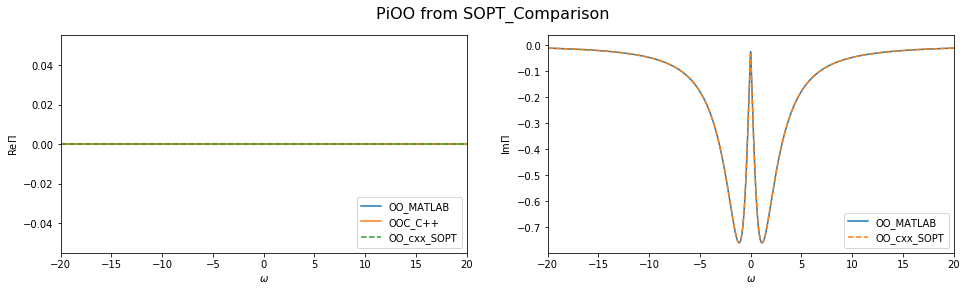

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("PiOO from SOPT_Comparison", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*20); 
    ax[i].set_xlabel('$\omega$');
    
ax[0].set_ylabel('Re$\Pi$'); ax[1].set_ylabel('Im$\Pi$');
ax[0].plot([-100,100],[0,0], label='OO_MATLAB');#ax[0].plot(v,real(PiOO),label='OO_MATLAB');                               
ax[0].plot(w,Re_Pia_OO, label='OOC_C++');          
ax[0].plot(w,RePiOO_SOPT, '--', label='OO_cxx_SOPT');     
ax[0].legend(loc='lower right');                    

ax[1].plot(v,2.*imag(PiOO),label='OO_MATLAB');
#ax[1].plot(w,Im_Pia_OO,label='OOC_C++');
ax[1].plot(w,ImPiOO_SOPT, '--',label='OO_cxx_SOPT');
ax[1].legend(loc='lower right');
#ax[1].set_ylim(-.05,0)

In [18]:
v2 = np.array(file['v']); # load data
ReSE = np.array(file['ReSE'])
ImSE = np.array(file['ImSE'])

In [19]:
SER_mat = ReSE + 1j*ImSE
ReSER_mat = real(SER_mat)
ImSER_mat = imag(SER_mat)

In [20]:
def n(w):
    return 1.*(w<=0)

In [21]:
SEK_mat = (1.-2.*n(v2))*(SER_mat - conj(SER_mat))

ReSEK_mat = real(SEK_mat)
ImSEK_mat = imag(SEK_mat)

In [37]:
data4 = np.loadtxt('../../cmake-build-debug/Output/SelfEnergyR_cxx.dat')
data5 = np.loadtxt('../../cmake-build-debug/Output/SelfEnergyK_cxx.dat')

In [38]:
w2 = data4[:,0]

ReSER_cxx = data4[:,1]
ImSER_cxx = data4[:,2]

ReSEK_cxx = data5[:,1]
ImSEK_cxx = data5[:,2]

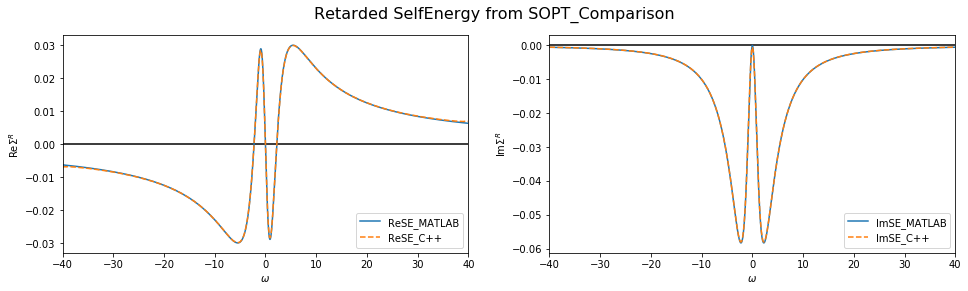

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Retarded SelfEnergy from SOPT_Comparison", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*40); 
    ax[i].set_xlabel('$\omega$');
    ax[i].plot([-100,100],[0,0], '-k')
    #ax[i].set_ylim(-0.05, 0);
ax[0].set_ylabel('Re$\Sigma^R$'); ax[1].set_ylabel('Im$\Sigma^R$');
ax[0].plot(v2,ReSER_mat,label='ReSE_MATLAB');        ax[1].plot(v2,ImSER_mat,label='ImSE_MATLAB');
ax[0].plot(w2,ReSER_cxx,'--', label='ReSE_C++');     ax[1].plot(w2,ImSER_cxx,'--', label='ImSE_C++');
ax[0].legend(loc='lower right');            ax[1].legend(loc='lower right');


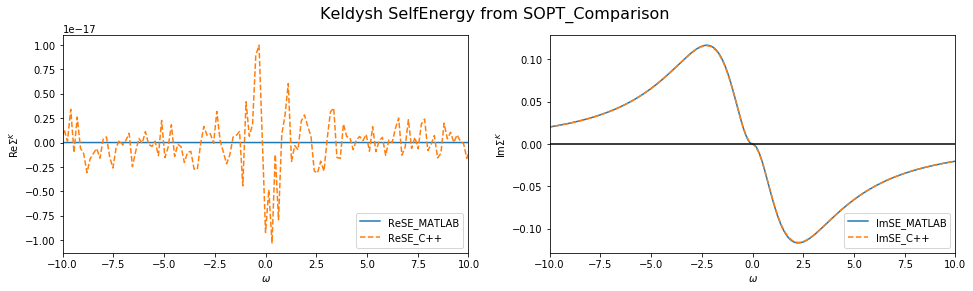

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Keldysh SelfEnergy from SOPT_Comparison", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*10); 
    ax[i].set_xlabel('$\omega$');
    #ax[i].set_ylim(-0.05, 0);
ax[0].set_ylabel('Re$\Sigma^K$'); ax[1].set_ylabel('Im$\Sigma^K$');
ax[0].plot(v2,ReSEK_mat,label='ReSE_MATLAB');        ax[1].plot(v2,ImSEK_mat,label='ImSE_MATLAB');
ax[0].plot(w2,ReSEK_cxx, '--', label='ReSE_C++');          ax[1].plot(w2,ImSEK_cxx, '--', label='ImSE_C++');
ax[0].legend(loc='lower right');            ax[1].legend(loc='lower right');
ax[1].plot([-100,100],[0,0], '-k');

In [ ]:
ls

In [ ]:
ls ../../cmake-build-debug/Output/

In [42]:
SER_R_data = np.loadtxt('../../cmake-build-debug/Output/SelfEnergyR_R_cxx.dat')
SER_A_data = np.loadtxt('../../cmake-build-debug/Output/SelfEnergyR_A_cxx.dat')
SER_K_data = np.loadtxt('../../cmake-build-debug/Output/SelfEnergyR_K_cxx.dat')

SEK_R_data = np.loadtxt('../../cmake-build-debug/Output/SelfEnergyK_R_cxx.dat')
SEK_A_data = np.loadtxt('../../cmake-build-debug/Output/SelfEnergyK_A_cxx.dat')
SEK_K_data = np.loadtxt('../../cmake-build-debug/Output/SelfEnergyK_K_cxx.dat')

w3 = SER_R_data[:,0]

ReSER_R = SER_R_data[:,1]
ImSER_R = SER_R_data[:,2]
ReSER_A = SER_A_data[:,1]
ImSER_A = SER_A_data[:,2]
ReSER_K = SER_K_data[:,1]
ImSER_K = SER_K_data[:,2]

ReSERi = ReSER_R + ReSER_A + ReSER_K;
ImSERi = ImSER_R + ImSER_A + ImSER_K;

ReSEK_R = SEK_R_data[:,1]
ImSEK_R = SEK_R_data[:,2]
ReSEK_A = SEK_A_data[:,1]
ImSEK_A = SEK_A_data[:,2]
ReSEK_K = SEK_K_data[:,1]
ImSEK_K = SEK_K_data[:,2]

ReSEKi = ReSEK_R + ReSEK_A + ReSEK_K;
ImSEKi = ImSEK_R + ImSEK_A + ImSEK_K;

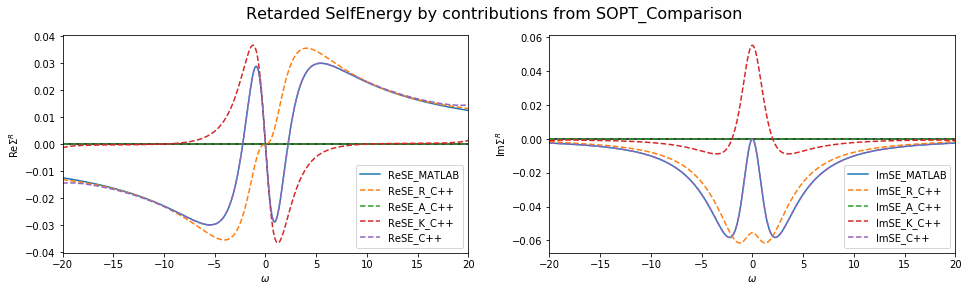

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Retarded SelfEnergy by contributions from SOPT_Comparison", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*20); 
    ax[i].set_xlabel('$\omega$');
    ax[i].plot([-100,100],[0,0], '-k')
    #ax[i].set_ylim(-0.04, 0.04);
ax[0].set_ylabel('Re$\Sigma^R$'); ax[1].set_ylabel('Im$\Sigma^R$');
ax[0].plot(v2,ReSER_mat,label='ReSE_MATLAB');        ax[1].plot(v2,ImSER_mat,label='ImSE_MATLAB');
ax[0].plot(w3,ReSER_R,'--', label='ReSE_R_C++');     ax[1].plot(w3,ImSER_R,'--', label='ImSE_R_C++');
ax[0].plot(w3,ReSER_A,'--', label='ReSE_A_C++');     ax[1].plot(w3,ImSER_A,'--', label='ImSE_A_C++');
ax[0].plot(w3,ReSER_K,'--', label='ReSE_K_C++');     ax[1].plot(w3,ImSER_K,'--', label='ImSE_K_C++');
ax[0].plot(w3,ReSERi,'--', label='ReSE_C++');        ax[1].plot(w3,ImSERi,'--', label='ImSE_C++');
#ax[0].plot(w3,.3/w3,'--', label='ReSE_C++');        ax[1].plot(w3,-.3/(w3**2),'--', label='ImSE_C++');
ax[0].legend(loc='lower right');            ax[1].legend(loc='lower right');


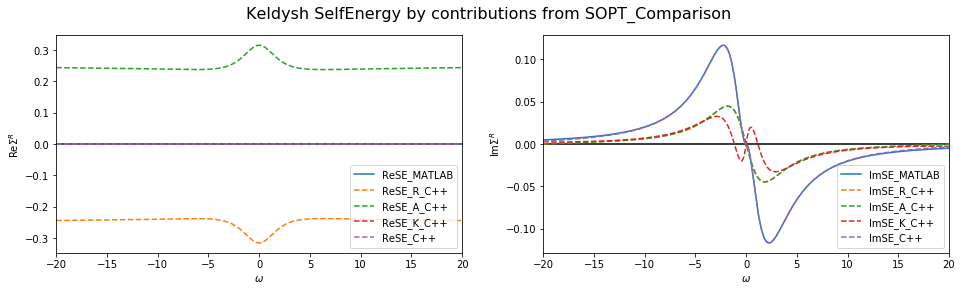

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Keldysh SelfEnergy by contributions from SOPT_Comparison", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*20); 
    ax[i].set_xlabel('$\omega$');
    ax[i].plot([-100,100],[0,0], '-k')
    #ax[i].set_ylim(-0.05, 0);
ax[0].set_ylabel('Re$\Sigma^R$'); ax[1].set_ylabel('Im$\Sigma^R$');
ax[0].plot(v2,ReSEK_mat,label='ReSE_MATLAB');        ax[1].plot(v2,ImSEK_mat,label='ImSE_MATLAB');
ax[0].plot(w3,ReSEK_R,'--', label='ReSE_R_C++');     ax[1].plot(w3,ImSEK_R,'--', label='ImSE_R_C++');
ax[0].plot(w3,ReSEK_A,'--', label='ReSE_A_C++');     ax[1].plot(w3,ImSEK_A,'--', label='ImSE_A_C++');
ax[0].plot(w3,ReSEK_K,'--', label='ReSE_K_C++');     ax[1].plot(w3,ImSEK_K,'--', label='ImSE_K_C++');
ax[0].plot(w3,ReSEKi,'--', label='ReSE_C++');        ax[1].plot(w3,ImSEKi,'--', label='ImSE_C++');
ax[0].legend(loc='lower right');            ax[1].legend(loc='lower right');